In [1]:
from __future__ import print_function, division
import os
import sys
import timeit as timeit
from tqdm import tqdm

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math

import healpy as hp
import astropy
from astropy import coordinates as coords
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic
from astropy import units as u

import _maps as maps

In [2]:
N_ps = 1000000
b_list = ( -np.pi/2 + np.arccos( 2 * np.random.random(N_ps) - 1) ) 

(array([  245.,   749.,  1238.,  1713.,  2281.,  2717.,  3292.,  3646.,
         4057.,  4578.,  5003.,  5719.,  5964.,  6414.,  6994.,  7282.,
         7764.,  8153.,  8723.,  9090.,  9426.,  9809., 10237., 10660.,
        11011., 11316., 11730., 12010., 12184., 12368., 12940., 13136.,
        13055., 13610., 13874., 14093., 14239., 14323., 14886., 14862.,
        15177., 14996., 15338., 15281., 15392., 15810., 15628., 15726.,
        15644., 15809., 15713., 15674., 15758., 15870., 15482., 15506.,
        15350., 15182., 15213., 14639., 14826., 14736., 14536., 14273.,
        13981., 14030., 13648., 13294., 13062., 12889., 12462., 12327.,
        12018., 11710., 11296., 10866., 10720., 10207.,  9697.,  9296.,
         9105.,  8629.,  8342.,  7729.,  7484.,  6827.,  6554.,  5988.,
         5675.,  5044.,  4571.,  4110.,  3645.,  3126.,  2607.,  2163.,
         1707.,  1237.,   754.,   250.]),
 array([-9.98391894e-01, -9.78409961e-01, -9.58428027e-01, -9.38446093e-01,
        -9.1846416

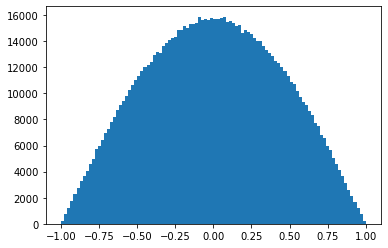

In [3]:
plt.hist(b_list / (np.pi / 2), bins = 100)

In [4]:
b_list_cut = ( -np.pi/2 + np.arccos( np.sqrt(3) / 2 * (2 * np.random.random( int(N_ps / 12) ) - 1)) ) 

(array([ 527.,  563.,  518.,  574.,  589.,  554.,  641.,  645.,  610.,
         656.,  679.,  691.,  675.,  767.,  752.,  790.,  751.,  774.,
         781.,  823.,  773.,  829.,  871.,  867.,  889.,  840.,  843.,
         852.,  898.,  905.,  906.,  930.,  957.,  973.,  985.,  999.,
         987.,  992.,  945., 1018.,  990., 1001.,  961., 1018., 1055.,
        1037., 1013.,  987.,  999., 1049.,  998., 1037., 1006., 1007.,
         941., 1004., 1010.,  910.,  976.,  995.,  985.,  975.,  972.,
         915.,  979.,  973.,  968.,  938.,  944.,  923.,  928.,  887.,
         922.,  914.,  933.,  913.,  837.,  885.,  867.,  770.,  803.,
         785.,  724.,  766.,  756.,  712.,  712.,  724.,  662.,  717.,
         668.,  644.,  613.,  568.,  627.,  618.,  569.,  578.,  554.,
         492.]),
 array([-6.66655101e-01, -6.53322656e-01, -6.39990211e-01, -6.26657766e-01,
        -6.13325320e-01, -5.99992875e-01, -5.86660430e-01, -5.73327985e-01,
        -5.59995540e-01, -5.46663095e-01, -5.33330

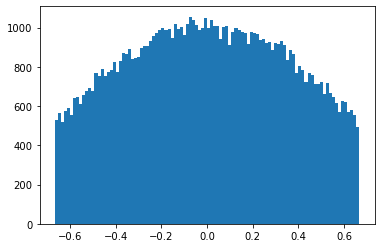

In [5]:
plt.hist(b_list_cut / (np.pi / 2), bins = 100)

In [6]:
b_list_cut_theta = ( -np.pi/2 + np.arccos( np.sqrt(3) / 2 * (2 * np.random.random( int(N_ps / 2) ) - 1)) ) 

(array([3147., 3176., 3323., 3395., 3443., 3614., 3643., 3758., 3913.,
        3986., 4084., 4176., 4219., 4469., 4484., 4501., 4644., 4508.,
        4825., 4808., 5063., 4947., 4879., 5105., 5143., 5234., 5367.,
        5433., 5522., 5589., 5425., 5486., 5657., 5720., 5696., 5748.,
        5881., 5806., 5930., 5987., 5859., 5912., 6119., 6062., 5972.,
        5966., 6155., 5928., 6020., 5965., 6051., 6103., 6122., 6141.,
        5881., 5886., 6142., 5884., 6003., 5814., 5827., 5862., 5905.,
        5691., 5813., 5631., 5800., 5624., 5544., 5567., 5578., 5341.,
        5391., 5307., 5322., 5395., 5093., 5069., 5122., 4844., 4903.,
        4823., 4753., 4669., 4590., 4399., 4292., 4297., 4204., 4098.,
        3996., 3829., 3817., 3737., 3681., 3555., 3363., 3377., 3144.,
        3028.]),
 array([-6.66665853e-01, -6.53332528e-01, -6.39999204e-01, -6.26665879e-01,
        -6.13332555e-01, -5.99999231e-01, -5.86665906e-01, -5.73332582e-01,
        -5.59999258e-01, -5.46665933e-01, -5.33332

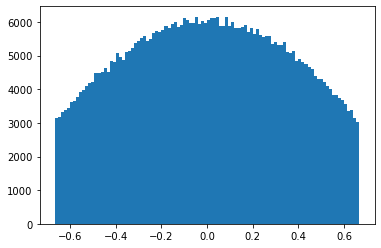

In [7]:
plt.hist(b_list_cut_theta / (np.pi / 2), bins = 100)

In [8]:
energy_list, energy_centers = maps.generate_energy_bins_()
ie = 30

# produce random point source total map
N_ps = int(500) # solid angle of 60x60 region is pi/3 (compared to 4pi)
N_counts = 100
l_list = np.pi / 3 * np.random.random(N_ps) - np.pi / 6
b_list = ( -np.pi/2 + np.arccos( 1 / 2 * (2 * np.random.random( int(N_ps) ) - 1 )) ) 

popt = np.flip([6.56775576, -1.58598391,  0.06022358]) # PSF from psf_fitting notebook
ps_loc = np.stack((l_list, b_list), axis = -1)
for i in range(len(energy_centers)):
    if i!=ie:
        continue
    ps_dict_list = [maps.generate_pointsource_(l_list[n],b_list[n],
                                          N_counts,energy_centers,popt,energy_bin=i
                                          ,randomize_number=True) for n in range(N_ps)]
    # convert ps data dictionary to an array as maps.dict_to_array_ fct
    for n in range(N_ps):
        l_events = ps_dict_list[n]['smeared_coords'].l.rad
        b_events = ps_dict_list[n]['smeared_coords'].b.rad
        e_events = ps_dict_list[n]['energies']
        e_bin_type = ie * np.ones(len(l_events))
        if n == 0:
            ps_events_ie = np.stack((l_events, b_events, e_events, e_bin_type), axis = -1)
        else:
            ps_events_ie_one = np.stack((l_events, b_events, e_events, e_bin_type), axis = -1)
            ps_events_ie = np.concatenate((ps_events_ie,ps_events_ie_one), axis = 0)
    
    if i == ie:
        ps_events = ps_events_ie
    else:
        ps_events = np.concatenate((ps_events,ps_events_ie), axis = 0)


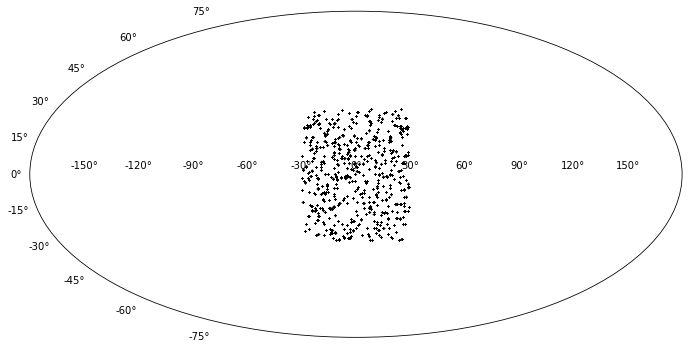

In [9]:
fig = plt.figure(1,figsize=(12,6))
ax = fig.add_subplot(111, projection='mollweide')

phi_events = ps_events[:,0]
phi_events[phi_events>np.pi] = phi_events[phi_events>np.pi]-2*np.pi

ax.scatter(ps_events[:,0], ps_events[:,1], c = 'k', s = 0.1)

In [10]:
# load father pixels and edge
NSIDE = 4
NPIX = hp.nside2npix(NSIDE)
arr_edge_points = maps.healpix_edge_generator_(NSIDE = 4, step = 100)

npix = 112
lon_edge = arr_edge_points[npix,:,0] ; lat_edge = arr_edge_points[npix,:,1]
l_edge = lon_edge - np.pi ; b_edge = lat_edge

l_edge_min = np.min(l_edge) ; l_edge_max = np.max(l_edge) 
b_edge_min = np.min(b_edge) ; b_edge_max = np.max(b_edge)

delta_l = l_edge_max - l_edge_min
sin_b_min = np.sin(b_edge_max)
delta_sin_b = - np.sin(b_edge_max) + np.sin(b_edge_min)

In [11]:
energy_list, energy_centers = maps.generate_energy_bins_()
ie = 30

# produce random point source total map
N_ps = int(500) # solid angle of 60x60 region is pi/3 (compared to 4pi)
N_counts = 100
l_list = delta_l * np.random.random(N_ps) + l_edge_min
b_list = ( np.pi/2 - np.arccos( (delta_sin_b * np.random.random( int(N_ps) ) + sin_b_min )) ) 
# b_list = ( np.pi/2 - np.arccos( 2 * np.random.random( int(N_ps) ) -1 ) ) 

popt = np.flip([6.56775576, -1.58598391,  0.06022358]) # PSF from psf_fitting notebook
ps_loc = np.stack((l_list, b_list), axis = -1)
for i in range(len(energy_centers)):
    if i!=ie:
        continue
    ps_dict_list = [maps.generate_pointsource_(l_list[n],b_list[n],
                                          N_counts,energy_centers,popt,energy_bin=i
                                          ,randomize_number=True) for n in range(N_ps)]
    # convert ps data dictionary to an array as maps.dict_to_array_ fct
    for n in range(N_ps):
        l_events = ps_dict_list[n]['smeared_coords'].l.rad
        b_events = ps_dict_list[n]['smeared_coords'].b.rad
        e_events = ps_dict_list[n]['energies']
        e_bin_type = ie * np.ones(len(l_events))
        if n == 0:
            ps_events_ie = np.stack((l_events, b_events, e_events, e_bin_type), axis = -1)
        else:
            ps_events_ie_one = np.stack((l_events, b_events, e_events, e_bin_type), axis = -1)
            ps_events_ie = np.concatenate((ps_events_ie,ps_events_ie_one), axis = 0)
    
    if i == ie:
        ps_events = ps_events_ie
    else:
        ps_events = np.concatenate((ps_events,ps_events_ie), axis = 0)

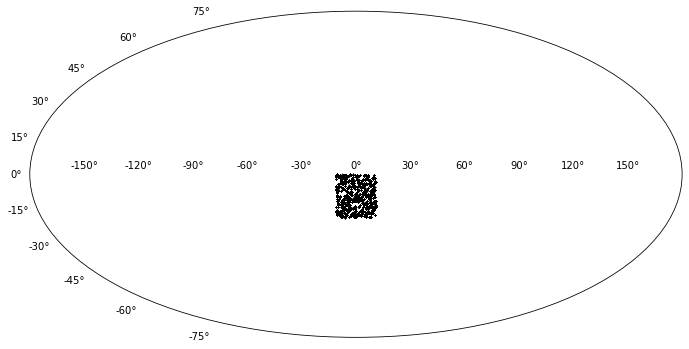

In [12]:
fig = plt.figure(1,figsize=(12,6))
ax = fig.add_subplot(111, projection='mollweide')

phi_events = ps_events[:,0]
phi_events[phi_events>np.pi] = phi_events[phi_events>np.pi]-2*np.pi

ax.scatter(ps_events[:,0], ps_events[:,1], c = 'k', s = 0.1)

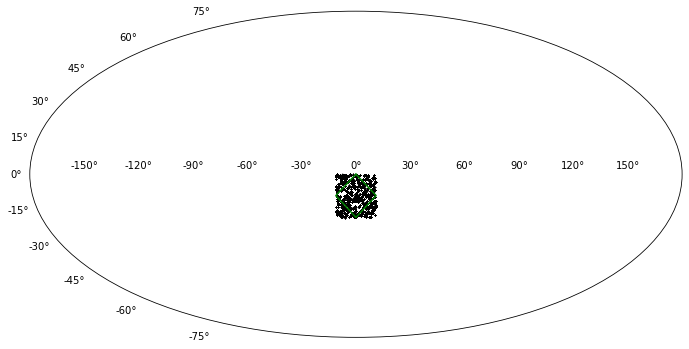

In [13]:
fig = plt.figure(1,figsize=(12,6))
ax = fig.add_subplot(111, projection='mollweide')

phi_events = ps_events[:,0]
phi_events[phi_events>np.pi] = phi_events[phi_events>np.pi]-2*np.pi

ax.scatter(ps_events[:,0], ps_events[:,1], c = 'k', s = 0.1)
ax.plot(lon_edge - np.pi, lat_edge, c = 'g')

In [14]:
energy_list, energy_centers = maps.generate_energy_bins_()
ie = 30

popt = np.flip([6.56775576, -1.58598391,  0.06022358]) # PSF from psf_fitting notebook

ps_dict_list = []
N_ps = 1000
N_counts = 10

while len(ps_dict_list) < N_ps:
    for i in range(len(energy_centers)):
        if i!=ie:
            continue
        l = delta_l * np.random.random(1) + l_edge_min
        b = ( np.pi/2 - np.arccos( (delta_sin_b * np.random.random( 1 ) + sin_b_min )) ) 
        
        ps_dict = maps.generate_pointsource_(l,b,
                                              N_counts,energy_centers,popt,energy_bin=i
                                              ,randomize_number=True) 
        l_ps = ps_dict['smeared_coords'].l.rad
        b_ps = ps_dict['smeared_coords'].b.rad
        
        # after loading the data, we need our angular coordinates to be given by
        # longitude ([0,2\pi]) and latitude (-\pi, \pi)
        phi_ps = l_ps.copy()
        phi_ps[phi_ps>np.pi] = phi_ps[phi_ps>np.pi]-2*np.pi

        lon_ps = phi_ps + np.pi
        lat_ps = b_ps
        
        lon_within, lat_within = maps.find_points_inside_pixel_(lon_ps, lat_ps, npix, lon_edge, lat_edge) # 2D array
        if len(lon_within) == len(lon_ps):
            ps_dict_list.append(ps_dict)
        else:
            continue

#         ps_dict_list.append(ps_dict)

In [15]:
# lon_noloop = np.delete(lon_edge, -1)
#         lat_noloop = np.delete(lat_edge, -1)

#         step = 100 # input for edge boundary creation
#         N_edge_points = NSIDE * step # include extra point to close loop
#         Nhalf = int(N_edge_points / 2)

#         lon_1 = lon_noloop[0:Nhalf] # split data to two disjoint sets
#         lon_2 = lon_noloop[Nhalf:]
#         lat_1 = lat_noloop[0:Nhalf]
#         lat_2 = lat_noloop[Nhalf:]

#         lon_1 = np.append(lon_1, lon_2[0]) 
#         lat_1 = np.append(lat_1, lat_2[0]) 
#         lon_2 = np.delete(lon_2, 0) # remove line connecting _2 to _1
#         lat_2 = np.delete(lat_2, 0)

#         lon_1 = np.append(lon_1, lon_1[0]) # close up each region by completing loop
#         lat_1 = np.append(lat_1, lat_1[0])
#         lon_2 = np.append(lon_2, lon_2[0]) 
#         lat_2 = np.append(lat_2, lat_2[0])

#         x_grid_1, y_grid_1 = maps.find_points_inside_curve_(lon_ps, lat_ps, lon_1, lat_1)
#         x_grid_2, y_grid_2 = maps.find_points_inside_curve_(lon_ps, lat_ps, lon_2, lat_2)

#         x_grid = np.concatenate((x_grid_1, x_grid_2))
#         y_grid = np.concatenate((y_grid_1, y_grid_2))

#         ###
#         # amendment: add points that are past the boundaries
#         # of disjoint pixels
#         n_x_miss_1 = np.where(lon_ps > np.max(lon_1))[0]
#         n_y_between_1 = np.intersect1d(
#             np.where(lat_ps > np.min(lat_1) )[0], np.where(lat_ps < np.max(lat_1))[0] )
#         n_miss_1 = np.intersect1d(n_x_miss_1, n_y_between_1)
#         x_miss_1 = lon_ps[n_miss_1]
#         y_miss_1 = lat_ps[n_miss_1]

#         n_x_miss_2 = np.where(lon_ps < np.min(lon_2))[0]
#         n_y_between_2 = np.intersect1d(
#             np.where(lat_ps > np.min(lat_2) )[0], np.where(lat_ps < np.max(lat_2))[0] )
#         n_miss_2 = np.intersect1d(n_x_miss_2, n_y_between_2)
#         x_miss_2 = lon_ps[n_miss_2]
#         y_miss_2 = lat_ps[n_miss_2]
        
#         x_grid = np.concatenate((x_grid, x_miss_1))
#         x_grid = np.concatenate((x_grid, x_miss_2))
#         y_grid = np.concatenate((y_grid, y_miss_1))
#         y_grid = np.concatenate((y_grid, y_miss_2))
        
#         lon_within = x_grid
#         lat_within = y_grid

In [16]:
# convert ps data dictionary to an array as maps.dict_to_array_ fct
for i in range(len(energy_centers)):
    for n in range(N_ps):
        l_events = ps_dict_list[n]['smeared_coords'].l.rad
        b_events = ps_dict_list[n]['smeared_coords'].b.rad
        e_events = ps_dict_list[n]['energies']
        e_bin_type = ie * np.ones(len(l_events))
        if n == 0:
            ps_events_ie = np.stack((l_events, b_events, e_events, e_bin_type), axis = -1)
        else:
            ps_events_ie_one = np.stack((l_events, b_events, e_events, e_bin_type), axis = -1)
            ps_events_ie = np.concatenate((ps_events_ie,ps_events_ie_one), axis = 0)

    if i == ie:
        ps_events = ps_events_ie
    else:
        ps_events = np.concatenate((ps_events,ps_events_ie), axis = 0)

ps_loc = np.stack((l_list, b_list), axis = -1)

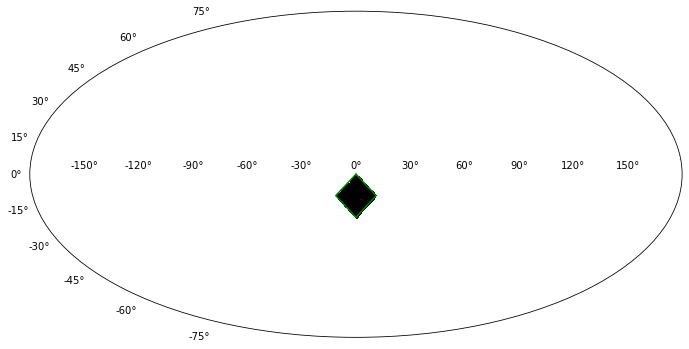

In [17]:
fig = plt.figure(1,figsize=(12,6))
ax = fig.add_subplot(111, projection='mollweide')

phi_events = ps_events[:,0]
phi_events[phi_events>np.pi] = phi_events[phi_events>np.pi]-2*np.pi

ax.scatter(ps_events[:,0], ps_events[:,1], c = 'k', s = 0.1)
ax.plot(lon_edge - np.pi, lat_edge, c = 'g')

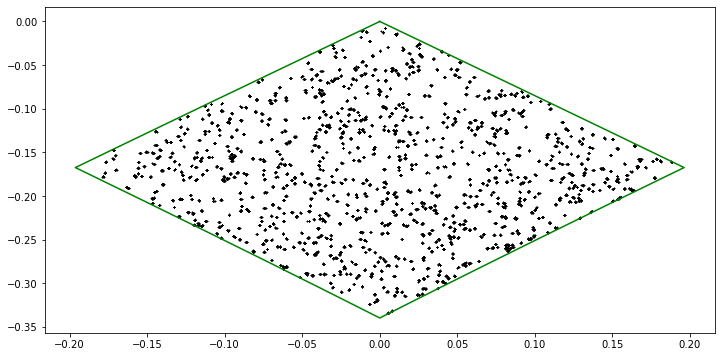

In [18]:
fig = plt.figure(1,figsize=(12,6))
ax = fig.add_subplot(111)

phi_events = ps_events[:,0]
phi_events[phi_events>np.pi] = phi_events[phi_events>np.pi]-2*np.pi

ax.scatter(ps_events[:,0], ps_events[:,1], c = 'k', s = 0.1)
ax.plot(lon_edge - np.pi, lat_edge, c = 'g')

In [19]:
energy_centers[ie]

129965.62575777009

In [20]:
# load father pixels and edge
NSIDE = 4
NPIX = hp.nside2npix(NSIDE)
arr_edge_points = maps.healpix_edge_generator_(NSIDE = 4, step = 100)

npix = 112
lon_edge = arr_edge_points[npix,:,0] ; lat_edge = arr_edge_points[npix,:,1]
l_edge = lon_edge - np.pi ; b_edge = lat_edge

l_edge_min = np.min(l_edge) ; l_edge_max = np.max(l_edge) 
b_edge_min = np.min(b_edge) ; b_edge_max = np.max(b_edge)

delta_l = l_edge_max - l_edge_min
sin_b_min = np.sin(b_edge_max)
delta_sin_b = - np.sin(b_edge_max) + np.sin(b_edge_min)

energy_list, energy_centers = maps.generate_energy_bins_()
ie = 30

N_ps = 200
N_counts = 30

popt = np.flip([6.56775576, -1.58598391,  0.06022358]) # PSF from psf_fitting notebook

ps_dict_list, ps_loc = maps.generate_point_sources_inside_curve_(N_ps,N_counts,npix,lon_edge,lat_edge,energy_list,popt,
                                                             ie)

In [21]:
print(ps_dict_list)

[{'center_coords': array([[-0.02059298],
       [-0.21057461]]), 'energies': array([133918.88670664, 125510.02261688, 137873.42454618, 123835.50264625,
       135469.64346857, 146983.48115443, 123858.83143358, 146473.11806199,
       120499.36530684, 119264.13444561, 135624.23723385, 132285.29068425,
       134682.7261823 , 143485.70043707, 134623.07723521, 133892.84056981,
       124552.28969844, 134323.20112926, 133562.33575827, 144485.4705014 ,
       118807.08765549, 139260.21316094, 126307.60146694]), 'coords': <SkyCoord (Galactic): (l, b) in deg
    [(358.82010908, -12.06503627), (358.82010908, -12.06503627),
     (358.82010908, -12.06503627), (358.82010908, -12.06503627),
     (358.82010908, -12.06503627), (358.82010908, -12.06503627),
     (358.82010908, -12.06503627), (358.82010908, -12.06503627),
     (358.82010908, -12.06503627), (358.82010908, -12.06503627),
     (358.82010908, -12.06503627), (358.82010908, -12.06503627),
     (358.82010908, -12.06503627), (358.82010908, -1

In [22]:
# convert ps data dictionary to an array as maps.dict_to_array_ fct
for n in range(N_ps):
    l_events = ps_dict_list[n]['smeared_coords'].l.rad
    b_events = ps_dict_list[n]['smeared_coords'].b.rad
    e_events = ps_dict_list[n]['energies']
    e_bin_type = ie * np.ones(len(l_events))
    if n == 0:
        ps_events = np.stack((l_events, b_events, e_events, e_bin_type), axis = -1)
    else:
        ps_events_one = np.stack((l_events, b_events, e_events, e_bin_type), axis = -1)
        ps_events = np.concatenate((ps_events,ps_events_one), axis = 0)

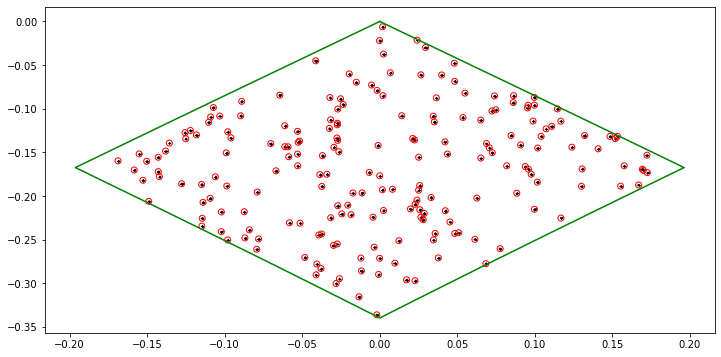

In [23]:
fig = plt.figure(1,figsize=(12,6))
ax = fig.add_subplot(111)

phi_events = ps_events[:,0]
phi_events[phi_events>np.pi] = phi_events[phi_events>np.pi]-2*np.pi

ax.scatter(ps_events[:,0], ps_events[:,1], c = 'k', s = 0.1)
ax.scatter(ps_loc[:,0], ps_loc[:,1], facecolors = 'none', edgecolors = 'r')
ax.plot(lon_edge - np.pi, lat_edge, c = 'g')

In [24]:
ps_loc.shape

(200, 2)